[ 4.66048233e-03 -1.62482417e-01  6.10841955e+01]


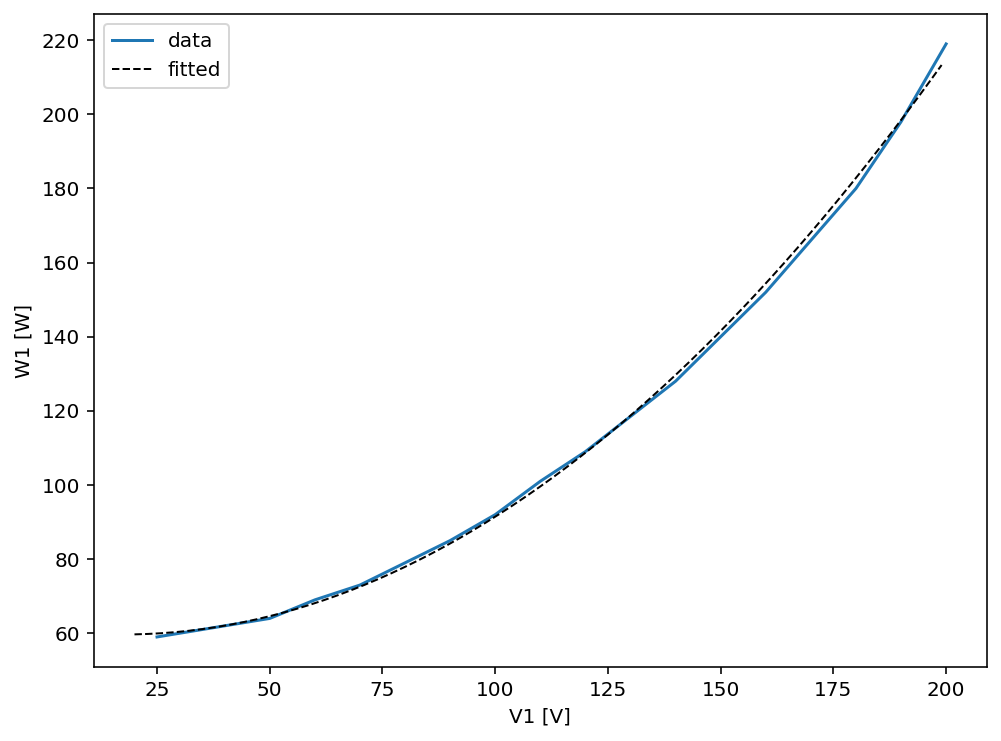

In [67]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

plt.figure(figsize=(8, 6), dpi=144)

#V1(V)	I1(A)	W1(W)	N(rpm)
mufuka1 = pd.read_excel(r"DataTotal.xlsx",sheet_name='無負荷試験1')
plt.plot(mufuka1["V1"],mufuka1["W1"],label="data(mufuka 1)")

fitting = np.polyfit(mufuka1["V1"],mufuka1["W1"],2) 
x = np.arange(20,200,1)
y = [fitting[0]*i*i+fitting[1]*i+fitting[2] for i in x]
plt.xlabel("V1 [V]")
plt.ylabel("W1 [W]")
print(fitting)
plt.plot(x,y,linestyle = "dashed", c="black",linewidth = 1,label="fitted")
plt.legend()

[ 5.58684581e-03 -4.00701556e-01  1.59684970e+02]


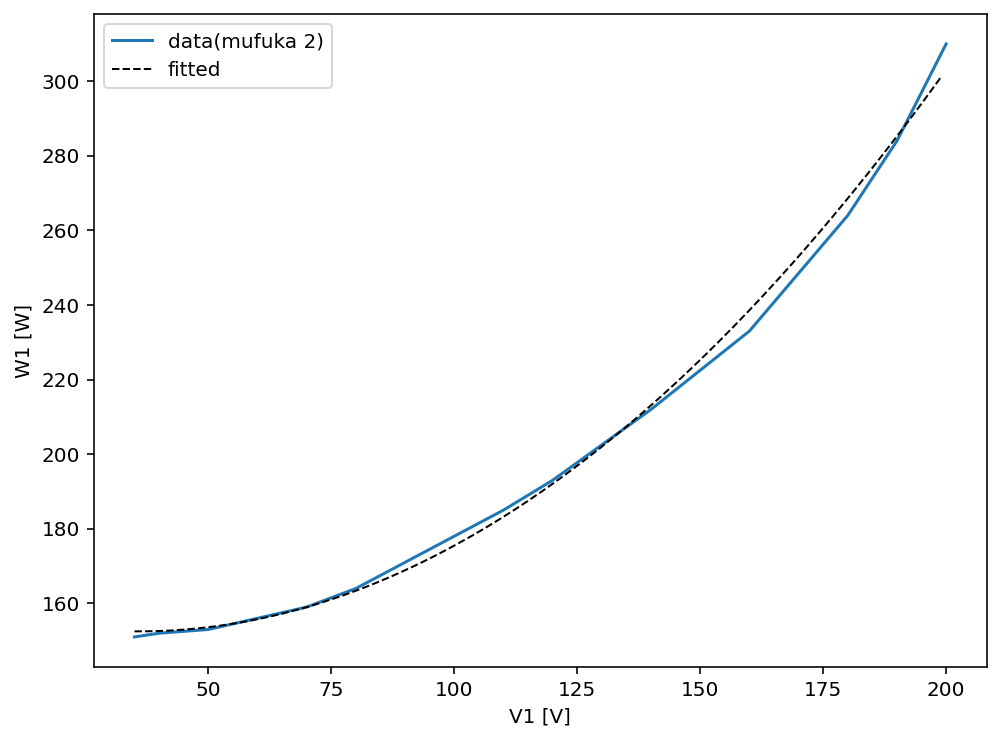

In [69]:
mufuka2 = pd.read_excel(r"DataTotal.xlsx",sheet_name='無負荷試験2')


plt.figure(figsize=(8, 6), dpi=144)
plt.plot(mufuka2["V1"],mufuka2["W1"],label="data(mufuka 2)")

fitting = np.polyfit(mufuka2["V1"],mufuka2["W1"],2) 
x = np.arange(35,200,1)
y = [fitting[0]*i*i+fitting[1]*i+fitting[2] for i in x]
plt.xlabel("V1 [V]")
plt.ylabel("W1 [W]")
print(fitting)
plt.plot(x,y,linestyle = "dashed", c="black",linewidth = 1,label="fitted")
plt.legend()